<h1> Определение перспективного тарифа для телеком компании</h1>

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#  Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [2]:
calls=pd.read_csv('/datasets/calls.csv', sep=",")
internet=pd.read_csv('/datasets/internet.csv', sep=",")
messages=pd.read_csv('/datasets/messages.csv', sep=",")
tariffs=pd.read_csv('/datasets/tariffs.csv', sep=",")
users=pd.read_csv('/datasets/users.csv', sep=",")

In [3]:
for i in [calls,internet,messages,tariffs,users]:
    display(i.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [4]:
for i in [calls,internet,messages,tariffs,users]:
    display(i.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Вывод

<p>Считали каждый файл с разделителем Tab, получили 5 таблиц.</p>
<p>Все 5 таблиц связаны между собой. В главной таблице есть данные о пользователях, в трёх дополнительных их статистика использования тарифов и одна таблица с тарифами.</p>
<p>Каждую таблицу ещё предстоит обработать(привести к нужному типу данных, заполнить пропуски, исправить артефакты).</p>


# Предобработка данных

Все столбцы с датами приведем к нужному типу.

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Значения по использованному трафику и звонкам округлим в большую сторону.

In [6]:
calls['duration']=calls['duration'].apply(math.ceil)
internet['mb_used']=internet['mb_used'].apply(math.ceil)

## Звонки

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [8]:
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [9]:
print('Процент пропущенных звонков {:.0%}'.format(calls[calls['duration']==0]['id'].count()/calls['id'].count()))

Процент пропущенных звонков 20%


Добавим столбец с месяцем.

In [10]:
calls['month']=pd.DatetimeIndex(calls['call_date']).month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Создадим срез без пропущенных звонков.

In [11]:
real_calls=calls.query('duration>0')
real_calls

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


## Количество звонков и сумма минут по месяцам

In [12]:
real_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])


count      sum
              duration duration
user_id month                  
1000    5           17      159
        6           28      172
        7           41      340
        8           42      408
        9           46      466
...                ...      ...
1498    10          30      247
1499    9            8       70
        10          44      449
        11          62      612
        12          56      492

[3168 rows x 2 columns]

In [13]:
calls_stat=real_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
calls_stat

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
...                 ...
1498    10          247
1499    9            70
        10          449
        11          612
        12          492

[3168 rows x 1 columns]

In [14]:
calls_stat=calls_stat.rename(columns={'duration':'calls_sum'})
calls_stat

calls_sum
user_id month           
1000    5            159
        6            172
        7            340
        8            408
        9            466
...                  ...
1498    10           247
1499    9             70
        10           449
        11           612
        12           492

[3168 rows x 1 columns]

## Сообщения

In [15]:
messages['month']=pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


### Количество сообщений по месяцам

In [16]:
messages_stat=messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_stat

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [17]:
messages_stat=messages_stat.rename(columns={'id':'messages_count'})
messages_stat

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

## Интернет

In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [19]:
internet['month']=pd.DatetimeIndex(internet['session_date']).month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


Обнаружили лишний столбец - удалим его.

In [20]:
internet = internet.drop('Unnamed: 0', 1)
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [21]:
internet['mb_used'].describe()

count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64

Видим, что минимальное значение трафика - 0. Значит в базе есть нулевые данные, которые могут повлиять на средние значения.

In [22]:
real_internet=internet.query('mb_used>0')
real_internet

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
...,...,...,...,...,...
149390,1499_151,753,2018-10-11,1499,10
149391,1499_152,319,2018-10-03,1499,10
149392,1499_153,491,2018-12-14,1499,12
149394,1499_155,1247,2018-11-26,1499,11


<h2>Сумма трафика по месяцам</h2>

In [23]:
internet_stat=real_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_stat

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3201 rows x 1 columns]

In [24]:
internet_stat=internet_stat.rename(columns={'mb_used':'internet_sum'})
internet_stat

internet_sum
user_id month              
1000    5              2256
        6             23257
        7             14016
        8             14070
        9             14581
...                     ...
1498    10            20604
1499    9              1848
        10            17809
        11            17984
        12            13077

[3201 rows x 1 columns]

##  Выручка по месяцам

Соединим наши свобдные таблицы в одну большую.

In [25]:
general_stat=internet_stat.merge(messages_stat, on=['user_id','month'], how='outer')
general_stat

internet_sum  messages_count
user_id month                              
1000    5            2256.0            22.0
        6           23257.0            60.0
        7           14016.0            75.0
        8           14070.0            81.0
        9           14581.0            57.0
...                     ...             ...
1273    12              NaN            39.0
1365    10              NaN             1.0
1377    2               NaN             2.0
1392    2               NaN             3.0
1446    8               NaN             1.0

[3214 rows x 2 columns]

In [26]:
general_stat=general_stat.sort_values(by=['user_id','month'],axis=0)
general_stat

internet_sum  messages_count
user_id month                              
1000    5            2256.0            22.0
        6           23257.0            60.0
        7           14016.0            75.0
        8           14070.0            81.0
        9           14581.0            57.0
...                     ...             ...
1498    10          20604.0            42.0
1499    9            1848.0            11.0
        10          17809.0            48.0
        11          17984.0            59.0
        12          13077.0            66.0

[3214 rows x 2 columns]

In [27]:
general_stat=general_stat.merge(calls_stat, on=['user_id','month'], how='outer')
general_stat

internet_sum  messages_count  calls_sum
user_id month                                         
1000    5            2256.0            22.0      159.0
        6           23257.0            60.0      172.0
        7           14016.0            75.0      340.0
        8           14070.0            81.0      408.0
        9           14581.0            57.0      466.0
...                     ...             ...        ...
1498    10          20604.0            42.0      247.0
1499    9            1848.0            11.0       70.0
        10          17809.0            48.0      449.0
        11          17984.0            59.0      612.0
        12          13077.0            66.0      492.0

[3214 rows x 3 columns]

In [28]:
general_stat=general_stat.reset_index()
general_stat

,user_id,month,internet_sum,messages_count,calls_sum
0,1000,5,2256.0,22.0,159.0
1,1000,6,23257.0,60.0,172.0
2,1000,7,14016.0,75.0,340.0
3,1000,8,14070.0,81.0,408.0
4,1000,9,14581.0,57.0,466.0
...,...,...,...,...,...
3209,1498,10,20604.0,42.0,247.0
3210,1499,9,1848.0,11.0,70.0
3211,1499,10,17809.0,48.0,449.0
3212,1499,11,17984.0,59.0,612.0


In [29]:
general_stat=general_stat.merge(users, on='user_id', how='outer')
general_stat

,user_id,month,internet_sum,messages_count,calls_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,2256.0,22.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,23257.0,60.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,14016.0,75.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,14070.0,81.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,14581.0,57.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,10.0,17809.0,48.0,449.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3212,1499,11.0,17984.0,59.0,612.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3213,1499,12.0,13077.0,66.0,492.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3214,1128,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [30]:
tariffs=tariffs.rename(columns={'tariff_name': 'tariff'}) 

In [31]:
general_stat=general_stat.merge(tariffs, on='tariff', how='inner')
general_stat

,user_id,month,internet_sum,messages_count,calls_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,2256.0,22.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,23257.0,60.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,14016.0,75.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,14070.0,81.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,14581.0,57.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,9.0,1848.0,11.0,70.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3212,1499,10.0,17809.0,48.0,449.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3213,1499,11.0,17984.0,59.0,612.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3214,1499,12.0,13077.0,66.0,492.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


In [32]:
def func(data):
    cell=0
    cell+=data['rub_monthly_fee']
    if data['messages_count']>data['messages_included']:
        cell+=(data['messages_count']-data['messages_included'])*data['rub_per_message']
    if data['calls_sum']>data['minutes_included']:
        cell+=(data['calls_sum']-data['minutes_included'])*data['rub_per_minute']
    if data['internet_sum']>data['mb_per_month_included']:
            cell+=math.ceil((data['internet_sum']-data['mb_per_month_included'])/1024)*data['rub_per_gb']
    return cell
general_stat['price']=general_stat.apply(func,axis=1)
general_stat

,user_id,month,internet_sum,messages_count,calls_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,price
0,1000,5.0,2256.0,22.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,23257.0,60.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,14016.0,75.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,14070.0,81.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,14581.0,57.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1499,9.0,1848.0,11.0,70.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,550.0
3212,1499,10.0,17809.0,48.0,449.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1150.0
3213,1499,11.0,17984.0,59.0,612.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,1513.0
3214,1499,12.0,13077.0,66.0,492.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,598.0


In [33]:
general_stat['price'].describe()

count    3216.000000
mean     1532.416356
std       799.624368
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: price, dtype: float64

Получили сводную таблицу с выручкой, с которой можно работать дальше.

## Вывод 

Для подсчеты выручки нам пришлось соеденить несколько сводных таблиц, на основании которых мы смогли написать функцию подсчета, которая учитывает дату регистрации и расторжения контракта с абонентом.

# Анализ данных

## Распределение средних значений каждого тарифа по месецам

In [34]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [35]:
internet_sum_users=internet_stat.reset_index().merge(users,on='user_id', how='outer')
internet_sum_users

,user_id,month,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3199,1499,11.0,17984.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3200,1499,12.0,13077.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3201,1128,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3202,1273,NaN,NaN,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra


In [36]:
internet_sum_users[internet_sum_users['tariff']=='smart']['internet_sum'].describe()

count     2227.000000
mean     16243.763359
std       5860.041941
min        202.000000
25%      12677.000000
50%      16533.000000
75%      20068.000000
max      38610.000000
Name: internet_sum, dtype: float64

In [37]:
internet_sum_avg=internet_sum_users.pivot_table(index=['month','tariff'], values='internet_sum',aggfunc='mean')
internet_sum_avg.round()

internet_sum
month tariff              
1.0   smart         8524.0
      ultra        13154.0
2.0   smart        11611.0
      ultra        12858.0
3.0   smart        15124.0
      ultra        17552.0
4.0   smart        13479.0
      ultra        16844.0
5.0   smart        15825.0
      ultra        19978.0
6.0   smart        15815.0
      ultra        19170.0
7.0   smart        15764.0
      ultra        20743.0
8.0   smart        16703.0
      ultra        19779.0
9.0   smart        16325.0
      ultra        19391.0
10.0  smart        16836.0
      ultra        20228.0
11.0  smart        16918.0
      ultra        19954.0
12.0  smart        18137.0
      ultra        21972.0

In [38]:
internet_sum_avg=internet_sum_avg.reset_index().set_index('month')
internet_sum_avg

,tariff,internet_sum
month,,
1.0,smart,8524.441176
1.0,ultra,13153.555556
2.0,smart,11611.396552
2.0,ultra,12858.500000
3.0,smart,15123.857143
3.0,ultra,17551.972973
4.0,smart,13479.482143
4.0,ultra,16843.800000
5.0,smart,15825.198582


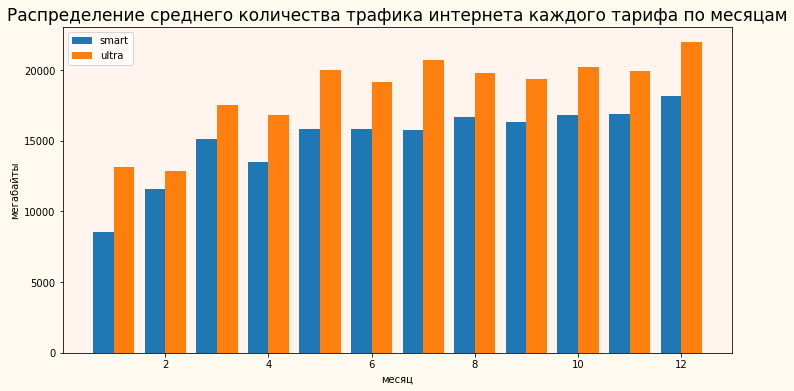

In [39]:
fig, ax = plt.subplots()
x1 = internet_sum_avg.index.unique() - 0.2
x2 = internet_sum_avg.index.unique() + 0.2
ax.bar(x1 , internet_sum_avg[internet_sum_avg['tariff']=='smart']['internet_sum'],label='smart',width = 0.4)
ax.bar(x2 , internet_sum_avg[internet_sum_avg['tariff']=='ultra']['internet_sum'],label='ultra',width = 0.4)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('месяц')
ax.set_ylabel('мегабайты')
plt.title('Распределение среднего количества трафика интернета каждого тарифа по месяцам', fontsize=17)
plt.legend()
plt.show()


In [40]:
messages_count_users=messages_stat.reset_index().merge(users,on='user_id', how='outer')
messages_count_users

,user_id,month,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
2786,1462,NaN,NaN,72,NaT,Тольятти,Алёна,Абрамычева,2018-10-29,smart
2787,1466,NaN,NaN,37,NaT,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
2788,1469,NaN,NaN,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra
2789,1479,NaN,NaN,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart


In [41]:
messages_count_avg=messages_count_users.pivot_table(index=['month','tariff'], values='messages_count',aggfunc='mean')
messages_count_avg

messages_count
month tariff                
1.0   smart        20.000000
      ultra        43.428571
2.0   smart        27.940000
      ultra        32.937500
3.0   smart        35.550725
      ultra        47.800000
4.0   smart        35.864583
      ultra        44.512821
5.0   smart        39.032787
      ultra        48.769231
6.0   smart        38.577465
      ultra        52.313433
7.0   smart        38.988506
      ultra        62.136986
8.0   smart        38.750000
      ultra        58.897727
9.0   smart        39.219731
      ultra        63.294737
10.0  smart        39.082677
      ultra        69.776699
11.0  smart        39.881481
      ultra        66.159292
12.0  smart        42.264808
      ultra        72.008547

In [42]:
messages_count_avg=messages_count_avg.reset_index().set_index('month')
messages_count_avg

,tariff,messages_count
month,,
1.0,smart,20.000000
1.0,ultra,43.428571
2.0,smart,27.940000
2.0,ultra,32.937500
3.0,smart,35.550725
3.0,ultra,47.800000
4.0,smart,35.864583
4.0,ultra,44.512821
5.0,smart,39.032787


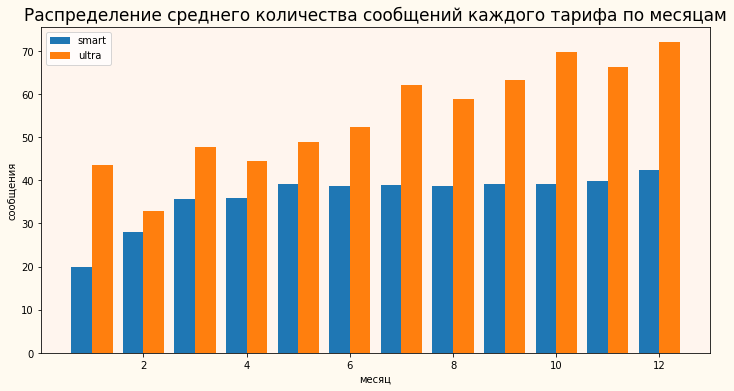

In [43]:
fig, ax = plt.subplots()
x1 = messages_count_avg.index.unique() - 0.2
x2 = messages_count_avg.index.unique() + 0.2
ax.bar(x1 , messages_count_avg[messages_count_avg['tariff']=='smart']['messages_count'],label='smart',width = 0.4)
ax.bar(x2 , messages_count_avg[messages_count_avg['tariff']=='ultra']['messages_count'],label='ultra',width = 0.4)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('месяц')
ax.set_ylabel('сообщения')
plt.title('Распределение среднего количества сообщений каждого тарифа по месяцам', fontsize=17)
plt.legend()
plt.show()

In [44]:
calls_sum_users=calls_stat.reset_index().merge(users,on='user_id', how='outer')
calls_sum_users

,user_id,month,calls_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3171,1231,NaN,NaN,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
3172,1328,NaN,NaN,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
3173,1371,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
3174,1473,NaN,NaN,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra


In [45]:
calls_sum_avg=calls_sum_users.pivot_table(index=['month','tariff'], values='calls_sum',aggfunc='mean')
calls_sum_avg

calls_sum
month tariff            
1.0   smart   210.030303
      ultra   428.111111
2.0   smart   298.689655
      ultra   310.043478
3.0   smart   390.051948
      ultra   489.648649
4.0   smart   370.441441
      ultra   475.301887
5.0   smart   387.361702
      ultra   534.250000
6.0   smart   398.067485
      ultra   497.469136
7.0   smart   408.353234
      ultra   570.885057
8.0   smart   423.269231
      ultra   535.813725
9.0   smart   430.266409
      ultra   563.963636
10.0  smart   427.590444
      ultra   581.728814
11.0  smart   436.647619
      ultra   562.364341
12.0  smart   479.985119
      ultra   614.925373

In [46]:
calls_sum_avg=calls_sum_avg.reset_index().set_index('month')
calls_sum_avg

,tariff,calls_sum
month,,
1.0,smart,210.030303
1.0,ultra,428.111111
2.0,smart,298.689655
2.0,ultra,310.043478
3.0,smart,390.051948
3.0,ultra,489.648649
4.0,smart,370.441441
4.0,ultra,475.301887
5.0,smart,387.361702


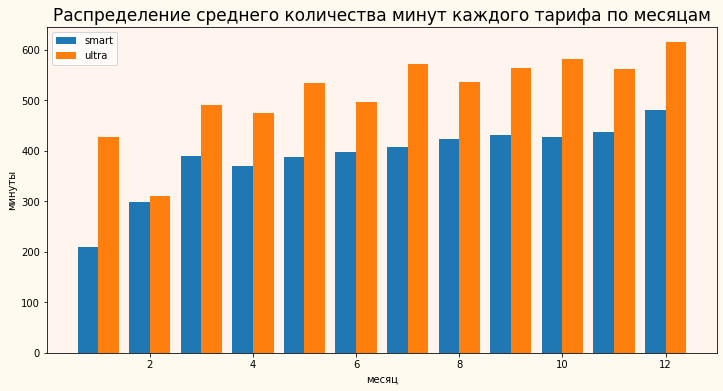

In [47]:
fig, ax = plt.subplots()
x1 = calls_sum_avg.index.unique() - 0.2
x2 = calls_sum_avg.index.unique() + 0.2
ax.bar(x1 , calls_sum_avg[messages_count_avg['tariff']=='smart']['calls_sum'],label='smart',width = 0.4)
ax.bar(x2 , calls_sum_avg[messages_count_avg['tariff']=='ultra']['calls_sum'],label='ultra',width = 0.4)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('месяц')
ax.set_ylabel('минуты')
plt.title('Распределение среднего количества минут каждого тарифа по месяцам', fontsize=17)
plt.legend()
plt.show()


## Распределение средней оплаты каждого тарифа по месецам

In [48]:
price_stat=general_stat.pivot_table(index=['month','tariff'], values='price',aggfunc='mean').reset_index().set_index('month')
price_stat

,tariff,price
month,,
1.0,smart,721.323529
1.0,ultra,1950.000000
2.0,smart,827.603448
2.0,ultra,1975.000000
3.0,smart,1164.623377
3.0,ultra,2014.864865
4.0,smart,963.089286
4.0,ultra,2001.818182
5.0,smart,1204.602837


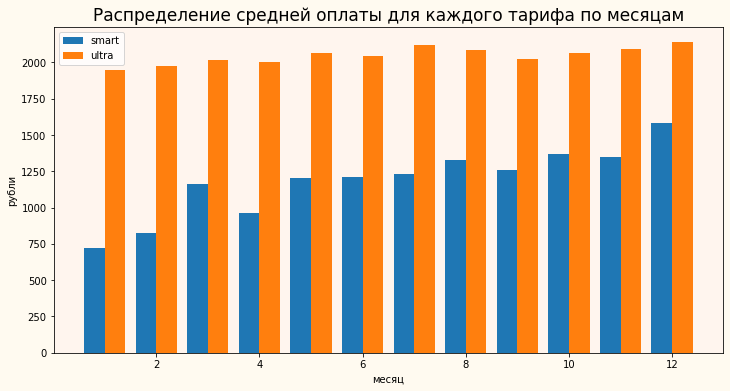

In [49]:
fig, ax = plt.subplots()
x1 = price_stat.index.unique() - 0.2
x2 = price_stat.index.unique() + 0.2
ax.bar(x1 , price_stat[price_stat['tariff']=='smart']['price'],label='smart',width = 0.4)
ax.bar(x2 , price_stat[price_stat['tariff']=='ultra']['price'],label='ultra',width = 0.4)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('месяц')
ax.set_ylabel('рубли')
plt.title('Распределение средней оплаты для каждого тарифа по месяцам', fontsize=17)
plt.legend()
plt.show()


## Среднее значение, дисперсия и стандартное отклонение трафика интернета в месяц для каждого тарифа

In [50]:
internet_sum_users

,user_id,month,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3199,1499,11.0,17984.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3200,1499,12.0,13077.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3201,1128,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3202,1273,NaN,NaN,46,NaT,Курган,Рэм,Корнилов,2018-05-15,ultra


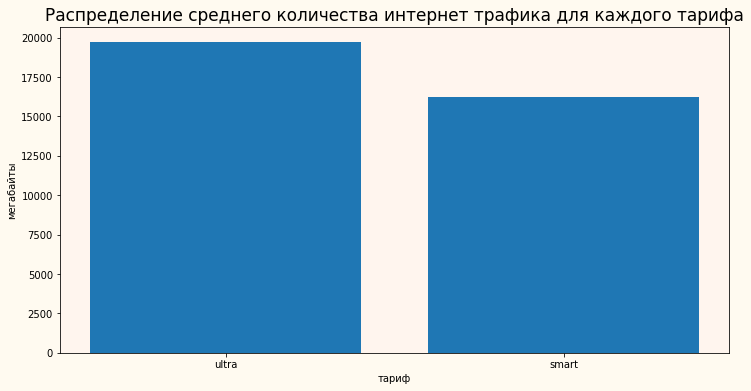

In [51]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[internet_sum_users[internet_sum_users['tariff']=='ultra']['internet_sum'].mean(),internet_sum_users[internet_sum_users['tariff']=='smart']['internet_sum'].mean()]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('мегабайты')
plt.title('Распределение среднего количества интернет трафика для каждого тарифа', fontsize=17)
plt.show()


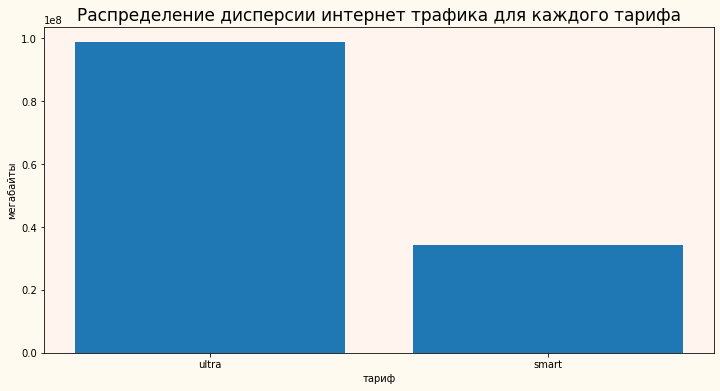

In [52]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.var(internet_sum_users[internet_sum_users['tariff']=='ultra']['internet_sum'],ddof=1),np.var(internet_sum_users[internet_sum_users['tariff']=='smart']['internet_sum'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('мегабайты')
plt.title('Распределение дисперсии интернет трафика для каждого тарифа', fontsize=17)
plt.show()


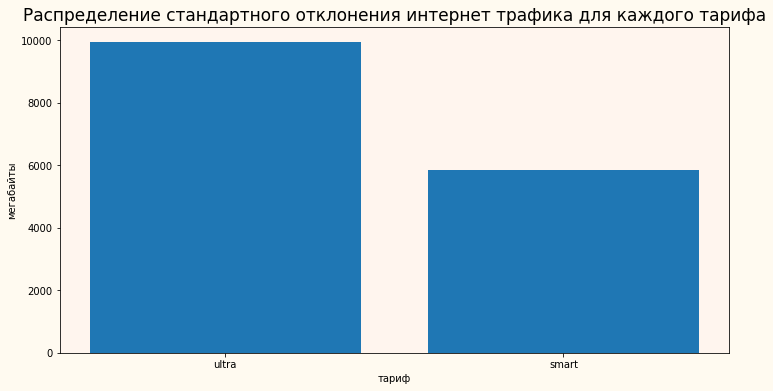

In [53]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.std(internet_sum_users[internet_sum_users['tariff']=='ultra']['internet_sum'],ddof=1),np.std(internet_sum_users[internet_sum_users['tariff']=='smart']['internet_sum'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('мегабайты')
plt.title('Распределение стандартного отклонения интернет трафика для каждого тарифа', fontsize=17)
plt.show()


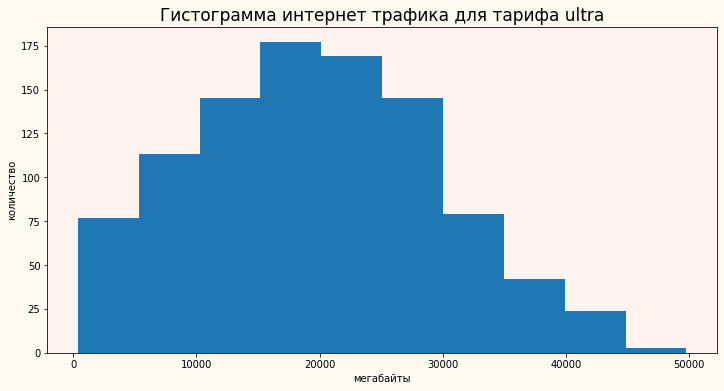

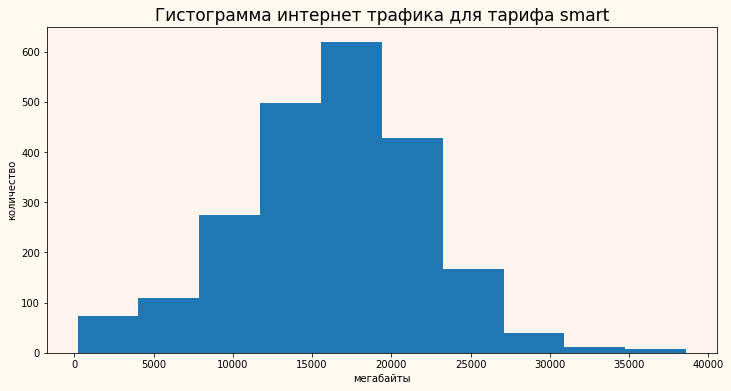

In [54]:
for i in ['ultra','smart']:
    fig, ax = plt.subplots()
    ax.hist(internet_sum_users[internet_sum_users['tariff']==i]['internet_sum'])
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('мегабайты')
    ax.set_ylabel('количество')
    plt.title('Гистограмма интернет трафика для тарифа '+i, fontsize=17)
    plt.show()

### Среднее значение, дисперсия и стандартное отклонение количества сообщений в месяц для каждого тарифа

In [55]:
messages_count_users

,user_id,month,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
2786,1462,NaN,NaN,72,NaT,Тольятти,Алёна,Абрамычева,2018-10-29,smart
2787,1466,NaN,NaN,37,NaT,Новосибирск,Рубен,Шевцов,2018-02-28,ultra
2788,1469,NaN,NaN,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra
2789,1479,NaN,NaN,40,NaT,Хабаровск,Игорь,Богданов,2018-07-03,smart


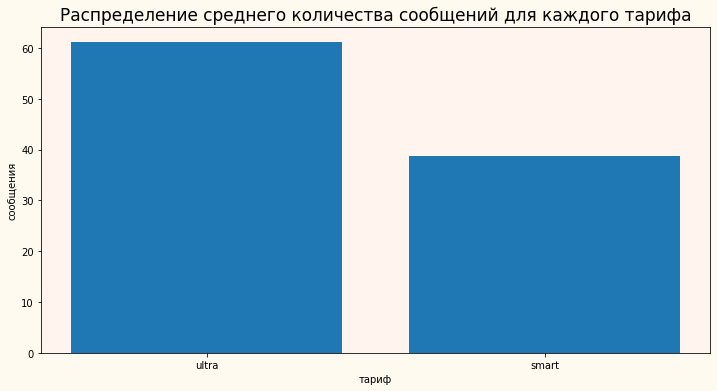

In [56]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[messages_count_users[messages_count_users['tariff']=='ultra']['messages_count'].mean(),messages_count_users[messages_count_users['tariff']=='smart']['messages_count'].mean()]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('сообщения')
plt.title('Распределение среднего количества сообщений для каждого тарифа', fontsize=17)
plt.show()


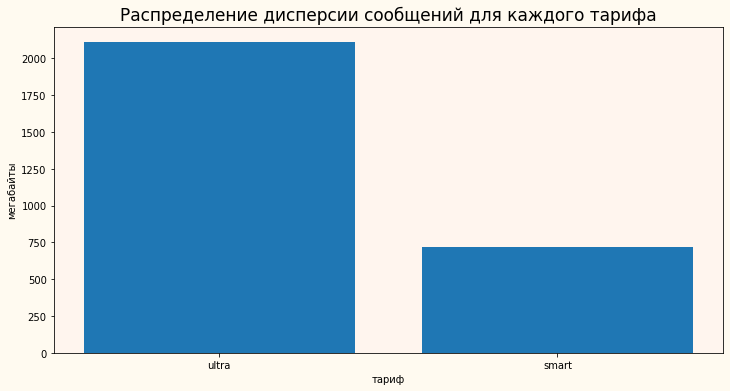

In [57]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.var(messages_count_users[messages_count_users['tariff']=='ultra']['messages_count'],ddof=1),np.var(messages_count_users[messages_count_users['tariff']=='smart']['messages_count'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('мегабайты')
plt.title('Распределение дисперсии сообщений для каждого тарифа', fontsize=17)
plt.show()


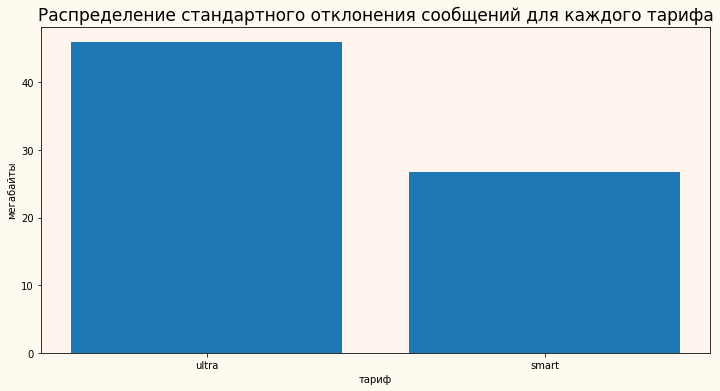

In [58]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.std(messages_count_users[messages_count_users['tariff']=='ultra']['messages_count'],ddof=1),np.std(messages_count_users[messages_count_users['tariff']=='smart']['messages_count'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('мегабайты')
plt.title('Распределение стандартного отклонения сообщений для каждого тарифа', fontsize=17)
plt.show()


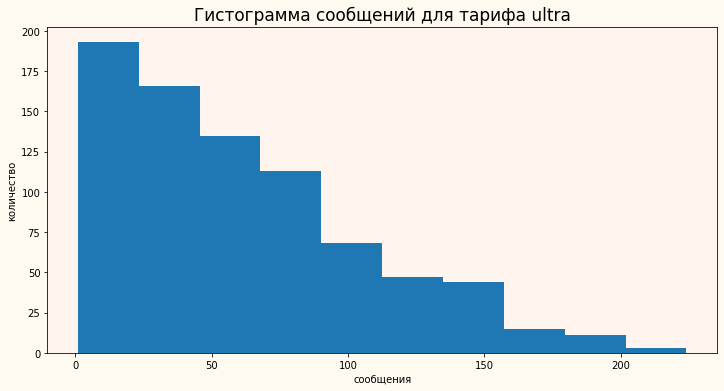

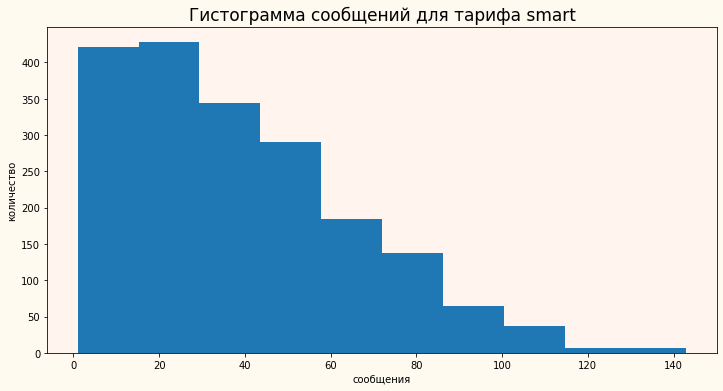

In [59]:
for i in ['ultra','smart']:
    fig, ax = plt.subplots()
    ax.hist(messages_count_users[messages_count_users['tariff']==i]['messages_count'])
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('сообщения')
    ax.set_ylabel('количество')
    plt.title('Гистограмма сообщений для тарифа '+i, fontsize=17)
    plt.show()

### Среднее значение, дисперсия и стандартное отклонение количества минут в месяц для каждого тарифа

In [60]:
calls_sum_users

,user_id,month,calls_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
3171,1231,NaN,NaN,63,NaT,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
3172,1328,NaN,NaN,44,NaT,Мурманск,Рауль,Аркадьев,2018-10-16,ultra
3173,1371,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart
3174,1473,NaN,NaN,18,NaT,Красноярск,Николай,Лебедев,2018-08-05,ultra


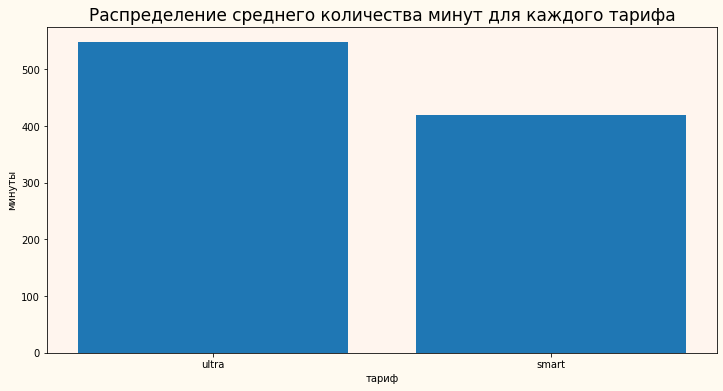

In [61]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[calls_sum_users[calls_sum_users['tariff']=='ultra']['calls_sum'].mean(),calls_sum_users[calls_sum_users['tariff']=='smart']['calls_sum'].mean()]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('минуты')
plt.title('Распределение среднего количества минут для каждого тарифа', fontsize=17)
plt.show()


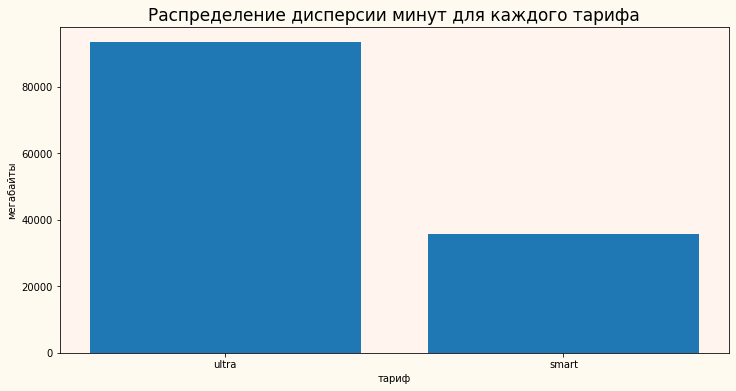

In [62]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.var(calls_sum_users[calls_sum_users['tariff']=='ultra']['calls_sum'],ddof=1),np.var(calls_sum_users[calls_sum_users['tariff']=='smart']['calls_sum'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('мегабайты')
plt.title('Распределение дисперсии минут для каждого тарифа', fontsize=17)
plt.show()


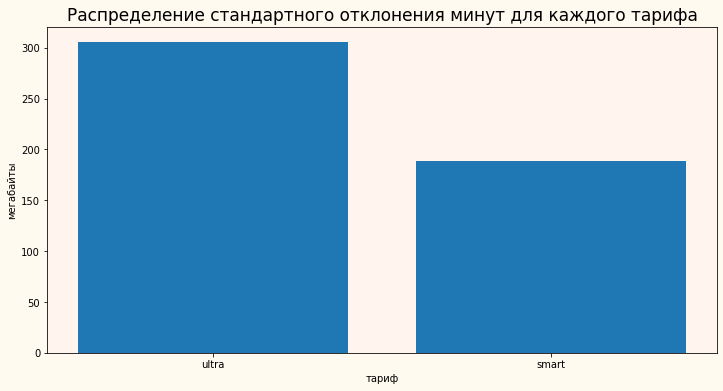

In [63]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.std(calls_sum_users[calls_sum_users['tariff']=='ultra']['calls_sum'],ddof=1),np.std(calls_sum_users[calls_sum_users['tariff']=='smart']['calls_sum'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('мегабайты')
plt.title('Распределение стандартного отклонения минут для каждого тарифа', fontsize=17)
plt.show()


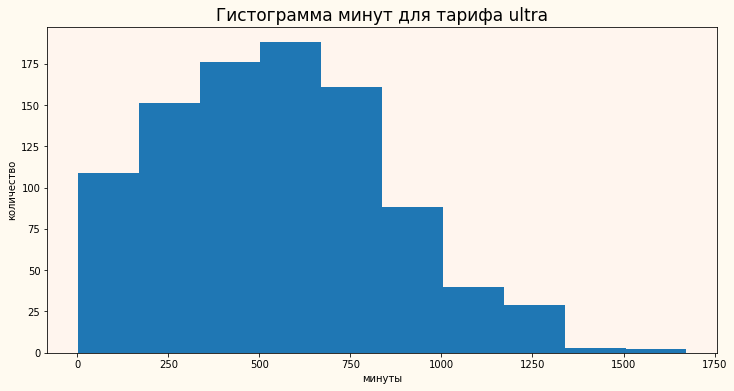

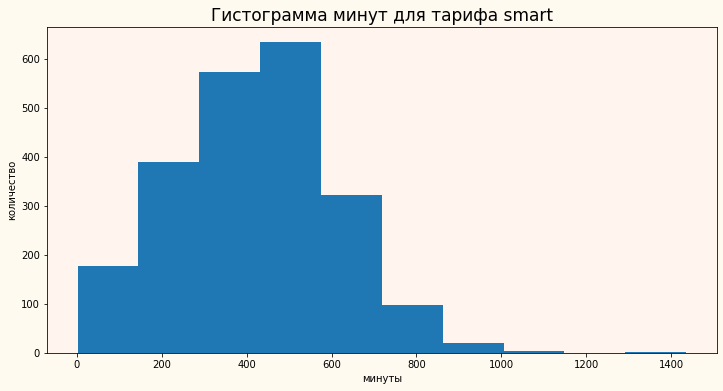

In [64]:
for i in ['ultra','smart']:
    fig, ax = plt.subplots()
    ax.hist(calls_sum_users[calls_sum_users['tariff']==i]['calls_sum'])
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('минуты')
    ax.set_ylabel('количество')
    plt.title('Гистограмма минут для тарифа '+i, fontsize=17)
    plt.show()

### Среднее значение, дисперсия и стандартное отклонение оплаты в месяц для каждого тарифа

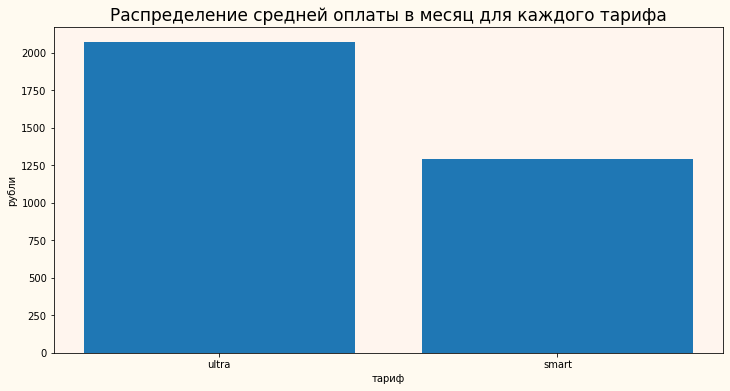

In [65]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[general_stat[general_stat['tariff']=='ultra']['price'].mean(),general_stat[general_stat['tariff']=='smart']['price'].mean()]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('рубли')
plt.title('Распределение средней оплаты в месяц для каждого тарифа', fontsize=17)
plt.show()


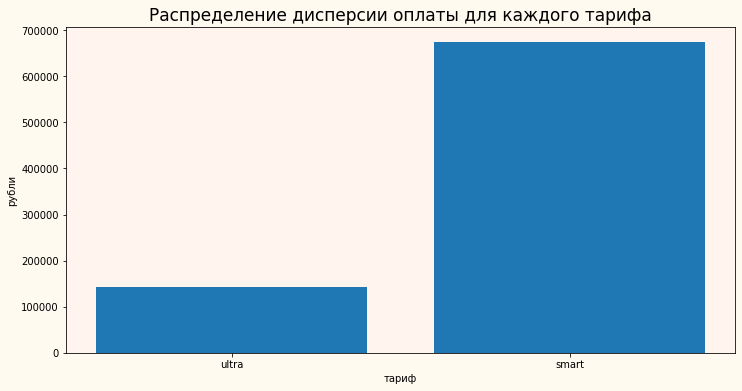

In [66]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.var(general_stat[general_stat['tariff']=='ultra']['price'],ddof=1),np.var(general_stat[general_stat['tariff']=='smart']['price'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('рубли')
plt.title('Распределение дисперсии оплаты для каждого тарифа', fontsize=17)
plt.show()


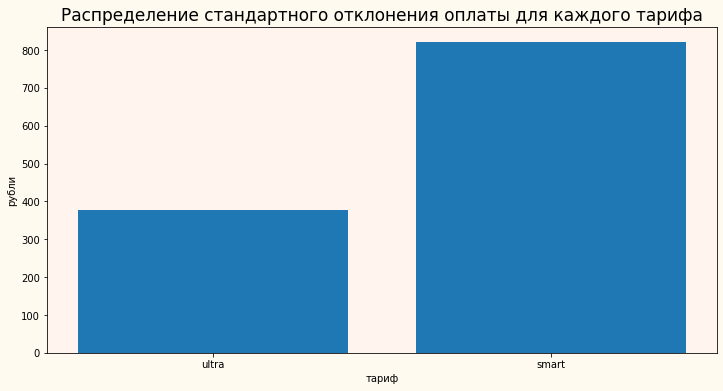

In [67]:
fig, ax = plt.subplots()
x=['ultra','smart']
y=[np.std(general_stat[general_stat['tariff']=='ultra']['price'],ddof=1),np.std(general_stat[general_stat['tariff']=='smart']['price'],ddof=1)]
ax.bar(x , y)
ax.set_facecolor('seashell')
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_xlabel('тариф')
ax.set_ylabel('рубли')
plt.title('Распределение стандартного отклонения оплаты для каждого тарифа', fontsize=17)
plt.show()


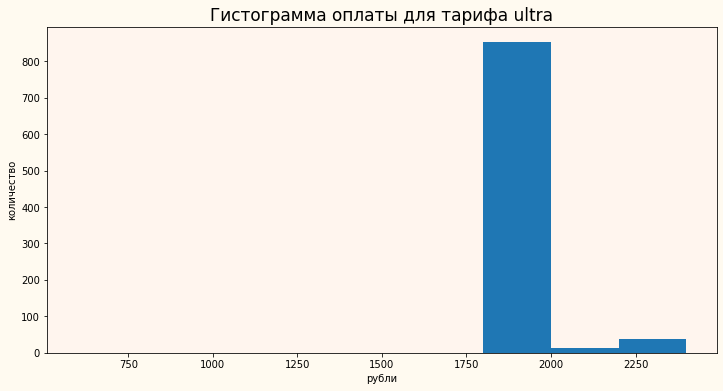

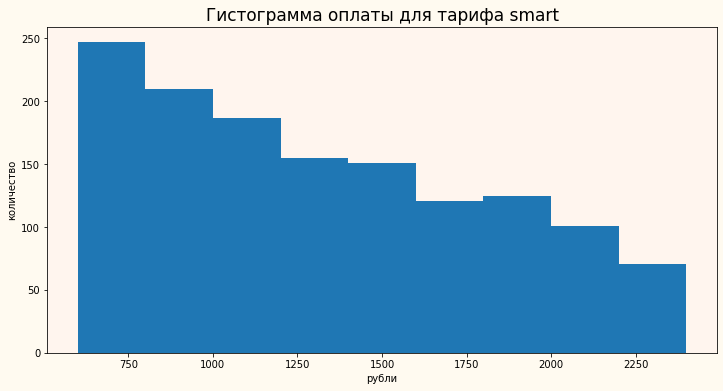

In [68]:
for i in ['ultra','smart']:
    fig, ax = plt.subplots()
    ax.hist(general_stat[general_stat['tariff']==i]['price'],bins=[600,800,1000,1200,1400,1600,1800,2000,2200,2400],range=(550,general_stat[general_stat['tariff']==i]['price'].quantile(0.99)))
    ax.set_facecolor('seashell')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    fig.set_facecolor('floralwhite')
    ax.set_xlabel('рубли')
    ax.set_ylabel('количество')
    plt.title('Гистограмма оплаты для тарифа '+i, fontsize=17)
    plt.show()

## Вывод

На первых графиках среднее значение по тарифам отличаются незначительно, а вот дисперсия и отклонение нам говорит, что в тарифе Ultra разрыв от среднего достаточно большой по всем показателям.

# Проверка гипотезы

## Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сверим средние выручки с каждого пользователя по тарифам на равенство, если гипотеза не верна, то мы сможем её откинуть и сказать, что выручки отличаются.

In [69]:
ultra_disp=np.var(general_stat[general_stat['tariff']=='ultra']['price'],ddof=1)
smart_disp=np.var(general_stat[general_stat['tariff']=='smart']['price'],ddof=1)
if abs(ultra_disp-smart_disp)>(ultra_disp*0.05):
    print('Дисперсия отличается больше чем на 5 процентов')
else:
    print('Дисперсия почти одинаковая')

Дисперсия отличается больше чем на 5 процентов


In [70]:
sample_ultra = general_stat[general_stat['tariff']=='ultra']['price']
sample_smart = general_stat[general_stat['tariff']=='smart']['price']
alpha = .05 
results = st.ttest_ind(
    sample_ultra, 
    sample_smart,
    equal_var  =  False 
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.2414049931248708e-246
Отвергаем нулевую гипотезу


Наша гипотеза не подтвердилась, значит с вероятностью 99% мы не можем говорить о равенстве выручек в разных тарифах.

## Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Аналогично поступим и с этой гипотезой, проверим наши выбоки на равенство.

In [71]:
msk_disp=np.var(general_stat[general_stat['city']=='Москва']['price'],ddof=1)
other_disp=np.var(general_stat[general_stat['city']!='Москва']['price'],ddof=1)
if abs(msk_disp-other_disp)>(msk_disp*0.05):
    print('Дисперсия отличается больше чем на 5 процентов')
else:
    print('Дисперсия почти одинаковая')

Дисперсия отличается больше чем на 5 процентов


In [72]:
sample_msk = general_stat[general_stat['city']=='Москва']['price']
sample_other = general_stat[general_stat['city']!='Москва']['price']
alpha = .05 
results = st.ttest_ind(
    sample_msk, 
    sample_other,
    equal_var  =  False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5086199993481282
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, значит мы не можем однозначно сказать, что средняя выручка отличается в зависимости от города.

## Вывод

На первый взгляд очевидные гипотезы на деле оказались совсем неочевидными. По этой выборке мы смогли подтведтить первую гипотезу и не смогли подтвердить вторую.

# Общий вывод

Мы проделали большой объём работы:
- провели предобработку данных
- посчиали кучу сводных таблиц(нашли значения использования данных по месяцам)
- соединяли таблици друг с другом

В последствии благодаря этому мы смогли:
- найти выручку по месяцам от каждого клиента с учётом его даты регистриции и расторжения контракта 
- высчитать среднюю выручку от клиента
- подтвердить гипотезу о различии выручки в зависимости от тарифа
- опровергнуть гипотезу о различии выручки в зависимости от города

Также наглядно отобразили среднее значение, дисперсию, стандартное оклонение и гистограмму для каждого параметра.
Среднее значение по тарифам отличается незначительно, но отклонение по тарифу Ultra достаточно большое, значит значения в этом тарифе разбросаны от среднего достаточно сильно.